In [199]:
# Import Dependencies
import os
import numpy as np
import pandas as pd
import utils as utils

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
# import warnings
#   warnings.filterwarnings("ignore")

### Preprocessing

In [200]:
# Import and read the data
df_raw = pd.read_csv("data/top_10000_1960-now.csv")

In [201]:
df_raw.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [202]:
# list columns for features and target
df_raw.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [203]:
# Drop unnecessary columns
# Listing all columns for review
# all columns are listed
# commenting out the columns to keep
df_data = df_raw.drop([#'Track URI',
                       #'Track Name',
                       'Artist URI(s)',
                       #'Artist Name(s)',
                       'Album URI',
                       'Album Name',
                       'Album Artist URI(s)',
                       'Album Artist Name(s)',
                       'Album Release Date',
                       'Album Image URL',
                       'Disc Number',
                       'Track Number',
                       'Track Duration (ms)',
                       'Track Preview URL',
                       'Explicit',
                       'Popularity',
                       'ISRC',
                       'Added By',
                       'Added At',
                       'Artist Genres',
                       #'Danceability',
                       #'Energy',
                       'Key',
                       'Loudness',
                       'Mode',
                       #'Speechiness',
                       #'Acousticness',
                       #'Instrumentalness',
                       #'Liveness',
                       #'Valence',
                       #'Tempo',
                       'Time Signature',
                       'Album Genres',
                       'Label',
                       'Copyrights'],
                       axis=1)

In [204]:
# Renaming columns to convention
df_data = df_data.rename(columns={
                   'Track Name': 'song',
                   'Track Name': 'track_name',
                   'Artist Name(s)': 'artist',
                   'Album Image URL': 'image',
                   'Popularity': 'popularity',
                   'Danceability': 'danceability',
                   'Energy': 'energy',
                   #'Key': 'key',
                   'Speechiness': 'speechiness',
                   'Acousticness': 'acousticness',
                   'Instrumentalness': 'instrumentalness',
                   'Liveness': 'liveness',
                   'Valence': 'valence',
                   'Tempo': 'tempo'
       })

In [205]:
# Verifying name update and
# Reviewing datatypes for analysis
df_data.dtypes

Track URI            object
track_name           object
artist               object
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [206]:
# removing duplicates
df_data = df_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [207]:
df_data.head()

,Track URI,track_name,artist,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.617,0.872,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.825,0.743,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.677,0.665,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.683,0.728,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.319,0.627,0.0687,0.6750,0.000073,0.2890,0.497,85.818


In [208]:
# drop nulls
df_data = df_data.dropna()
# reset index
df_data = df_data.reset_index(drop=True)


In [209]:
# # Convert 'explicit' column from boolean to binary
# df_data['explicit'] = df_data['explicit'].astype(int)
# # verify update
# df_data.head()

In [210]:
# add a numerical 'song_id' column for analysis
df_data = df_data.reset_index(names='song_id') 
df_data['song_id'] = df_data.index.to_series()


In [211]:
df_data.head()

,song_id,Track URI,track_name,artist,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.617,0.872,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.825,0.743,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.677,0.665,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.683,0.728,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.319,0.627,0.0687,0.6750,0.000073,0.2890,0.497,85.818


In [212]:
# Save the cleaned data as a CSV
df_data.to_csv('df_cleaned.csv')

In [213]:
# call the scaler
scaler_minmax = MinMaxScaler()
scaler_standardscaler = StandardScaler()

In [214]:
# create our features dataframe
df_features = df_data[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [215]:
# create X for analysis
X = df_features

In [216]:
# fit__transform the features
X_scaled_minmax = scaler_minmax.fit_transform(X)
X_scaled_stdsclr = scaler_standardscaler.fit_transform(X)

In [ ]:
# Save Scaled data
df_scaled = 

## K-Means

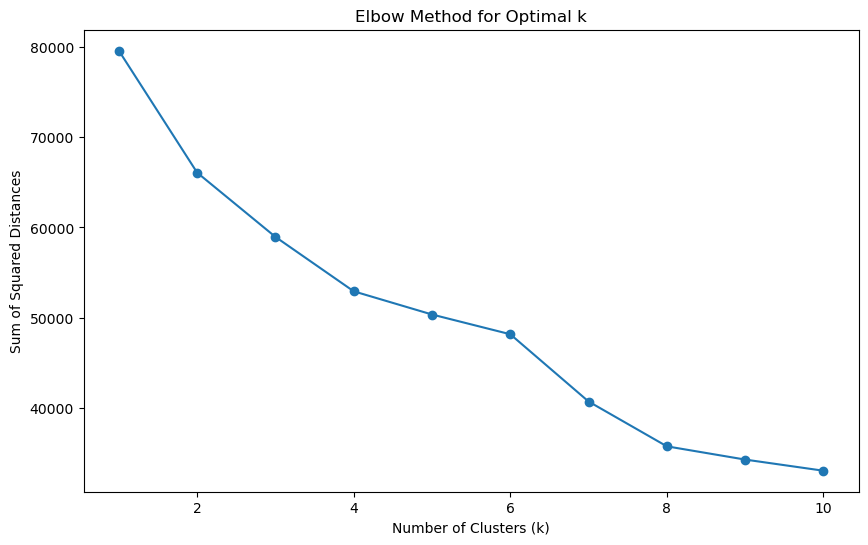

In [217]:
# Create the elbow curve with Standard Scaler
ssd = utils.elbow_method(X_scaled_stdsclr, 10)

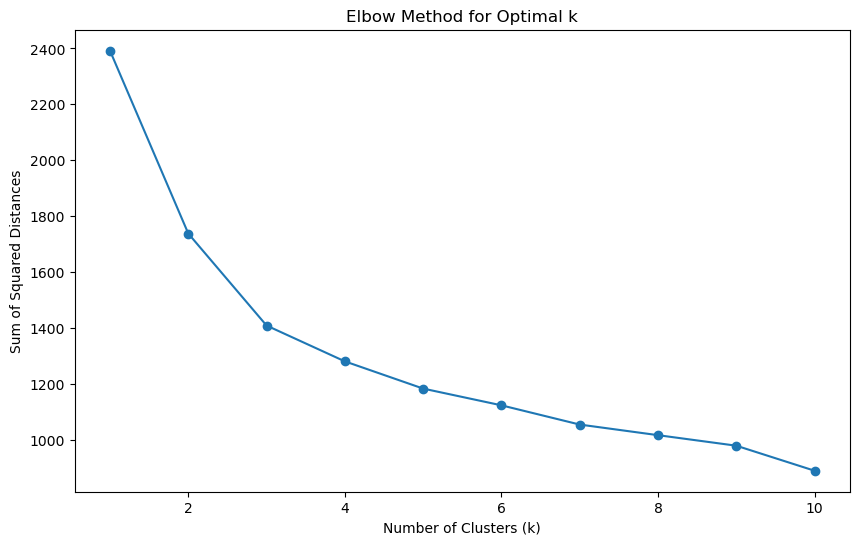

In [218]:
# Create the elbow curve with MinMax Scaler
ssd = utils.elbow_method(X_scaled_minmax, 10)

In [219]:
# Calculating the rate of decrease to validate k value
utils.rate_of_decrease(ssd)

Rate of decrease between k=1 and k=2: 654.0775735906775
Rate of decrease between k=2 and k=3: 329.1531036400431
Rate of decrease between k=3 and k=4: 128.13496897904042
Rate of decrease between k=4 and k=5: 97.37461547396128
Rate of decrease between k=5 and k=6: 59.898765170511524
Rate of decrease between k=6 and k=7: 68.805877754118
Rate of decrease between k=7 and k=8: 37.96566707501006
Rate of decrease between k=8 and k=9: 37.66970210971442
Rate of decrease between k=9 and k=10: 89.52862838144085


[654.0775735906775,
 329.1531036400431,
 128.13496897904042,
 97.37461547396128,
 59.898765170511524,
 68.805877754118,
 37.96566707501006,
 37.66970210971442,
 89.52862838144085]

In [220]:
df_scaled = pd.DataFrame(X_scaled_minmax, columns=['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    
)

In [221]:
df_scaled['song_id'] = df_scaled.index
df_scaled = df_scaled.set_index("song_id")
df_scaled.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_id,,,,,,,,
0,0.624494,0.874621,0.067511,0.015941,0.113706,0.405322,0.506533,0.511479
1,0.835020,0.745231,0.209564,0.014326,0.000022,0.230297,0.804020,0.583008
2,0.685223,0.666994,0.042897,0.565085,0.000001,0.333675,0.709548,0.344087
3,0.691296,0.730185,0.364276,0.573157,0.000052,0.027021,0.837186,0.345601
4,0.322874,0.628879,0.096624,0.681129,0.000074,0.283521,0.499497,0.393818


In [229]:
# Create a list to store values and the values of k
score_kmeans = []
score_agglomerative = []
score_birch = []
score_gaussian = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto')
    k_model.fit(df_scaled)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(df_scaled, labels)    
    score_kmeans.append(score)
    
    # AgglomerativeClustering variance and score
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_predictions = agglo_model.fit_predict(df_scaled)
    labels = agglo_model.labels_
    score = metrics.calinski_harabasz_score(df_scaled, labels)    
    score_agglomerative.append(score)    
    
    # # Birch variance and score
    # birch_model = Birch(n_clusters=i)
    # birch_model.fit(df_scaled)
    # labels = birch_model.labels_
    # print(np.unique(labels))
    # score = metrics.calinski_harabasz_score(df_scaled, labels)    
    # score_birch.append(score)

    # Gaussian variance and score
    gaussian_model = GaussianMixture(n_components=i)
    labels = gaussian_model.fit_predict(df_scaled)
    score = metrics.calinski_harabasz_score(df_scaled, labels)    
    score_gaussian.append(score)

In [230]:
# Display the scores.
display(score_kmeans)
display(score_agglomerative)
#display(score_birch)
display(score_gaussian)

[3743.6418455297244,
 3471.0079118689846,
 2877.0071581077623,
 2539.729960154234,
 2248.015771469355,
 2101.552492650259,
 1921.4670198657736,
 1793.9429537986964,
 1841.0901685274819]

[2532.9103930395822,
 2222.2612246959416,
 1886.1592782349683,
 1697.1893855521976,
 1612.1642723816792,
 1564.728881985441,
 1518.038647627655,
 1440.5786397894144,
 1380.6328963247006]

[244.98666106599458,
 361.55580333056196,
 703.3831260354696,
 566.6577428207548,
 445.5937488819135,
 541.8458056515163,
 565.9998441282042,
 479.1372891794077,
 334.96654351411104]

In [244]:
# save scaled data for interface
df_scaled.to_csv("df_scaled.csv")

In [231]:
# predict clusters
df_scaled_predictions = df_scaled.copy()
df_clusters = k_model.predict(df_scaled_predictions)
df_scaled_predictions["song_clusters"] = df_clusters
df_scaled.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_id,,,,,,,,
0,0.624494,0.874621,0.067511,0.015941,0.113706,0.405322,0.506533,0.511479
1,0.835020,0.745231,0.209564,0.014326,0.000022,0.230297,0.804020,0.583008
2,0.685223,0.666994,0.042897,0.565085,0.000001,0.333675,0.709548,0.344087
3,0.691296,0.730185,0.364276,0.573157,0.000052,0.027021,0.837186,0.345601
4,0.322874,0.628879,0.096624,0.681129,0.000074,0.283521,0.499497,0.393818


In [232]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [233]:
# Fit the scaled_encoded_stocks data to the PCA
songs_pca_data = pca.fit_transform(df_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
songs_pca_data[:5]

array([[-0.20439095, -0.18988751],
       [-0.31715989,  0.12740737],
       [ 0.19777652,  0.3000759 ],
       [ 0.11054697,  0.40454349],
       [ 0.46163662,  0.09393646]])

In [234]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.38661531, 0.23041738])

In [236]:
# Creating a DataFrame with the PCA data
df_songs_pca = pd.DataFrame(songs_pca_data, columns=["PCA1", "PCA2"])

# Copy the tickers names from the original data
df_songs_pca["song_id"] = df_scaled.index

# Set the Ticker column as index
df_songs_pca = df_songs_pca.set_index("song_id")

# Review the DataFrame
df_songs_pca.head()

,PCA1,PCA2
song_id,,
0,-0.204391,-0.189888
1,-0.317160,0.127407
2,0.197777,0.300076
3,0.110547,0.404543
4,0.461637,0.093936


In [237]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_songs_pca)

# Predict the model segments (clusters)
song_clusters = model.predict(df_songs_pca)

In [238]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_songs_pca_predictions = df_songs_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_songs_pca_predictions["song_clusters"] = song_clusters

# Review the DataFrame
df_songs_pca_predictions.head()

,PCA1,PCA2,song_clusters
song_id,,,
0,-0.204391,-0.189888,2
1,-0.317160,0.127407,0
2,0.197777,0.300076,1
3,0.110547,0.404543,0
4,0.461637,0.093936,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

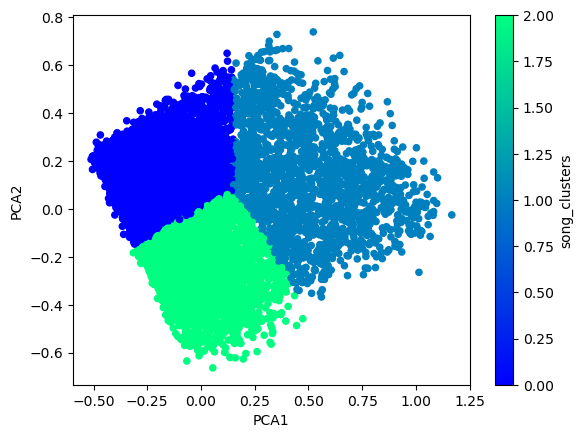

In [239]:
# Create the scatter plot with x="PCA1" and y="PCA2"
df_songs_pca_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="song_clusters",
    colormap='winter')

In [242]:
# Use the columns from the scaled and encoded DataFrame in step 2.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=df_scaled.columns)
pca_component_weights

,PCA1,PCA2
danceability,-0.197916,0.263513
energy,-0.510222,-0.149493
speechiness,-0.043555,-0.004259
acousticness,0.699329,0.488301
instrumentalness,-0.016356,-0.005184
liveness,-0.040144,-0.017955
valence,-0.451684,0.817133
tempo,-0.060391,-0.041241


<Axes: xlabel='acousticness', ylabel='valence'>

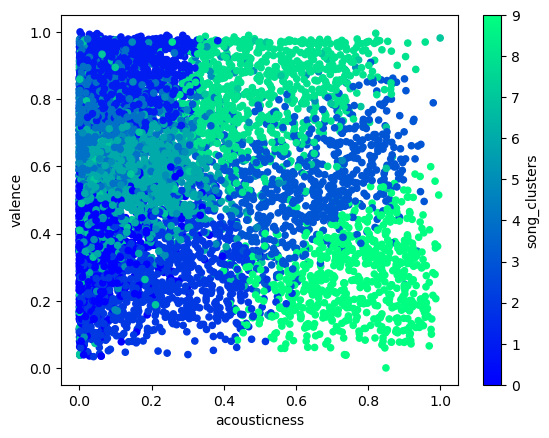

In [243]:
# Plot the features that have the strongest influence on each component. 
df_scaled_predictions.plot.scatter(
    x="acousticness",
    y="valence",
    c="song_clusters",
    colormap='winter')